 # End to End NLP Project

# Data Set Information:
## This corpus has been collected from free or free for research sources at the Internet: 

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link]. 
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link]. 
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link]. 
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches: 

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006. 

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007. 

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.

# Attribute Information:
## The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow: 

ham What you doing?how are you? 
ham Ok lar... Joking wif u oni... 
ham dun say so early hor... U c already then say... 
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H* 
ham Siva is in hostel aha:-. 
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor. 
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop 
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B 
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU 

## Note: the messages are not chronologically sorted.

# STEP:- 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
pd.set_option('display.max_rows',len(df))

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
df.columns=['Report','Message']

In [6]:
df.head()

,Report,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

# STEP:-2  EDA

ham     86.593683
spam    13.406317
Name: Report, dtype: float64

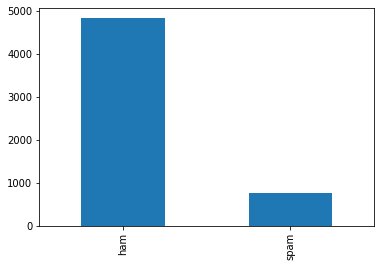

In [8]:
df['Report'].value_counts().plot(kind='bar')
df['Report'].value_counts(normalize=True)*100

In [9]:
df.Report.shape

(5572,)

# STEP:-3 PreProcess Data

In [10]:
spam_df=df.loc[df.Report=='spam']
spam_df.head()

,Report,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [11]:
ham_df=df.loc[df.Report=='ham']
ham_df.head()

,Report,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [12]:
!pip install wordcloud

In [13]:
from wordcloud import WordCloud,STOPWORDS
words_spam=' '.join(spam_df['Message'])
words_ham=' '.join(ham_df['Message'])

In [14]:
words=[words_spam,words_ham]
def wordcloud(words):
    for cloud in words:
        Remove_words=" ".join(word for word in cloud.split() if word!='txt' and word !='text' and word !='Text' and word !='Txt' and word!='Call' and word!='mob' and word!='have' and word!='call' and word!='cost')
        Remove_words[:2000]
        wc= WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(Remove_words)
        plt.figure(1,figsize=(30,20))
        plt.imshow(wc)     
        plt.axis('off')
        plt.show()

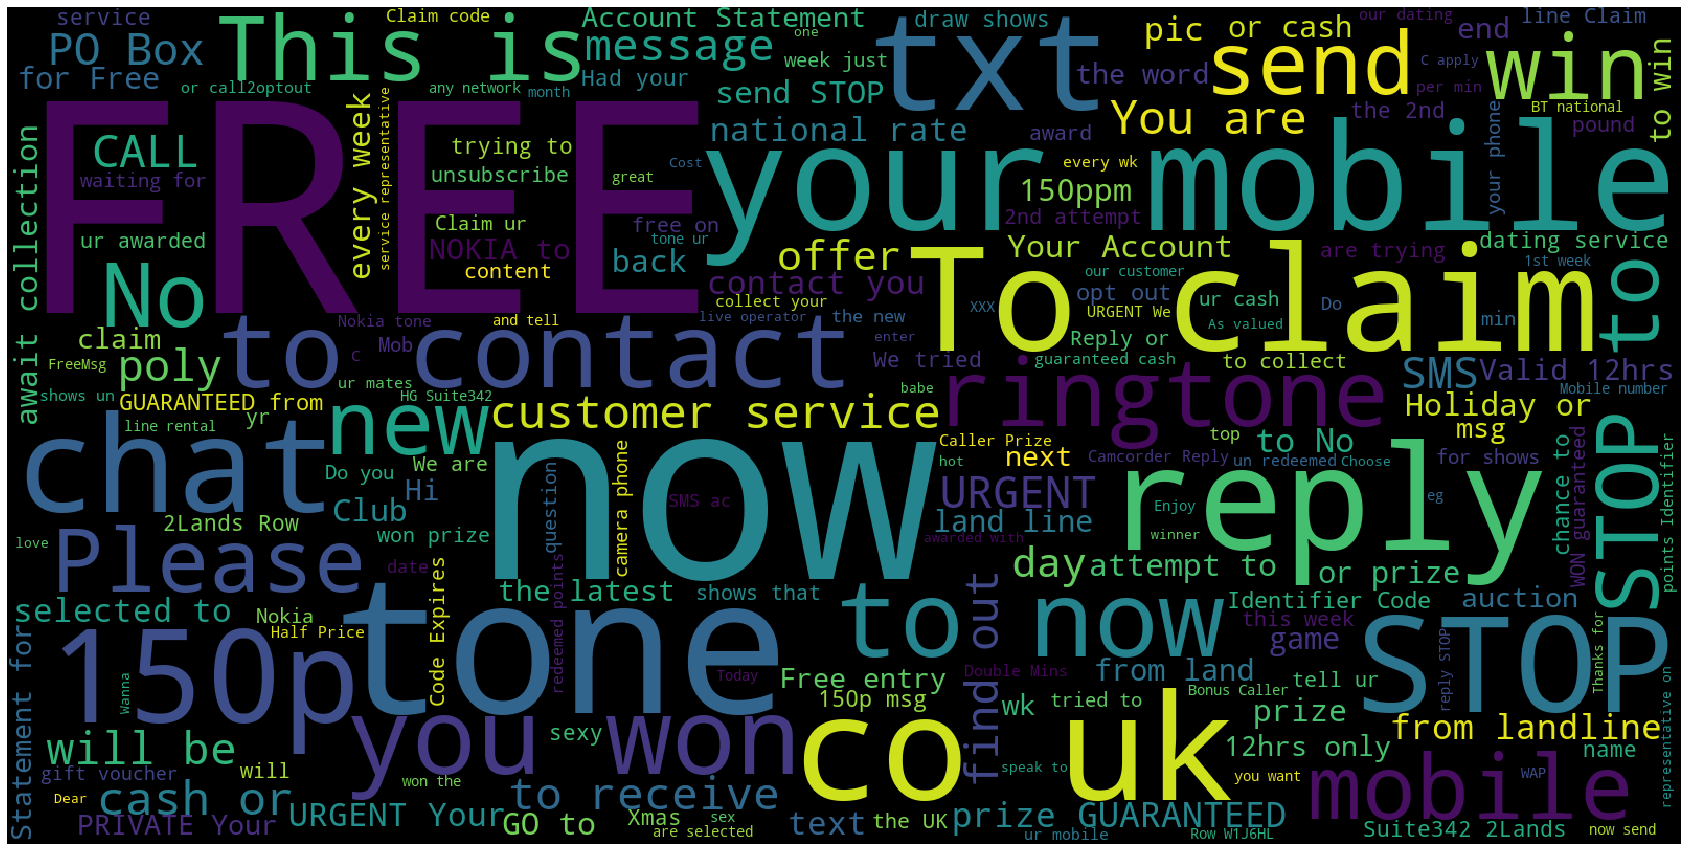

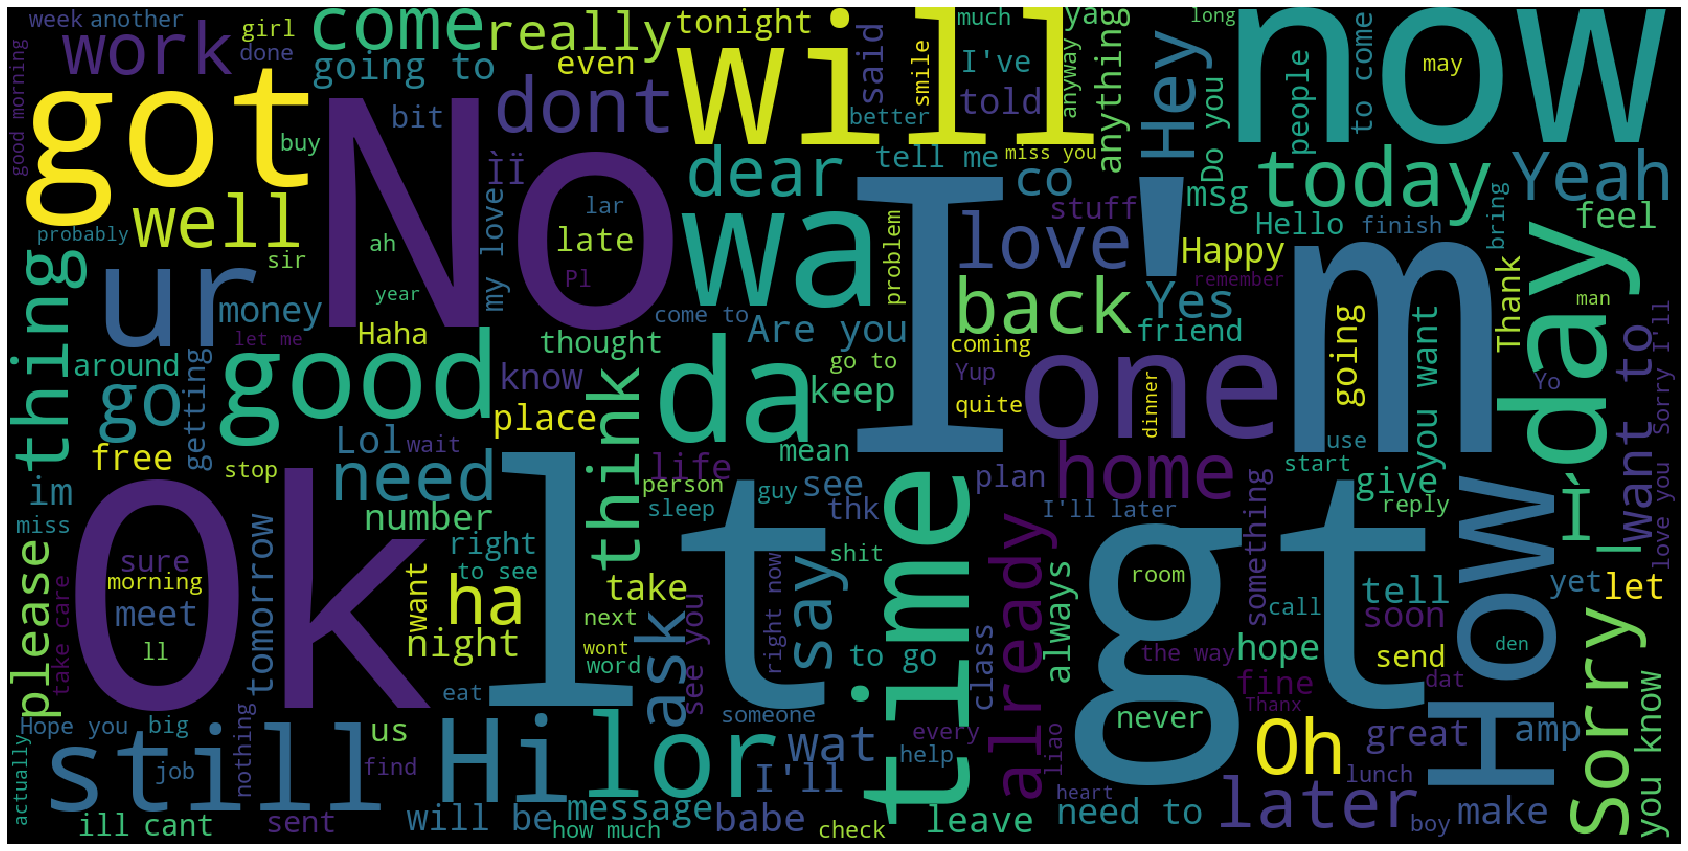

In [15]:
wordcloud(words)

In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
stem=PorterStemmer()
lem=WordNetLemmatizer()

In [18]:
clean=[]
clean_len=[]
def prep(Message,func):
    alphabet=re.sub("[^a-zA-Z]"," ",Message)
    alphabet=alphabet.lower()
    words=alphabet.split()
    words = [x for x in words if not x in stopwords.words("english")]
    
    if(func == 'stem'):
        words = [stem.stem(word) for word in words]
    else:
        words = [lem.lemmatize(word) for word in words]
        
    clean.append(" ".join(words))
    clean_len.append(len(words))
    

In [19]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to C:\Users\Nikita
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to C:\Users\Nikita
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
%%time

clean = []

clean_len = []

df['Message'].apply(lambda x: prep(x, 'stem'))

df['clean_stem'] = clean

df['Clean_len_stem'] = clean_len

Wall time: 58.6 s


In [22]:
%%time

clean = []

clean_len = []

df['Message'].apply(lambda x: prep(x, 'lemma'))

df['clean_lemma'] = clean

df['Clean_len_lemma'] = clean_len

Wall time: 1min 12s


In [23]:
df.head()

,Report,Message,clean_stem,Clean_len_stem,clean_lemma,Clean_len_lemma
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


In [24]:
df['category']=df['Report'].apply(lambda x: 1 if x=='spam' else 0)

In [25]:
df.head()

,Report,Message,clean_stem,Clean_len_stem,clean_lemma,Clean_len_lemma,category
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,0


# STEP:-4 Data Preparation

In [26]:
#train-test split
from sklearn.model_selection  import train_test_split
train, test = train_test_split(df,test_size=0.2,random_state=0)


In [27]:
train_text=[]
for text in train['clean_stem']:
    train_text.append(text)

test_text=[]
for text in test['clean_stem']:
    test_text.append(text)


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer = "word")

train_feature = vec.fit_transform(train_text)

test_feature = vec.transform(test_text)

# STEP:-5,6  Train Model and Their Evaluation

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [30]:
algo=[LogisticRegression(),DecisionTreeClassifier(),SVC()]
def algorithm(algo):
    for model in algo:
        ml=model
        dense_train=train_feature.toarray()
        dense_test=test_feature.toarray()
        fit = ml.fit(dense_train,train['Report'])
        pred = fit.predict(dense_test)
        accuracy = metrics.accuracy_score(test['Report'],pred)
        conf=metrics.confusion_matrix(test['Report'],pred)
        clas_repo=metrics.classification_report(test['Report'],pred)
        print(model)
        print('Accuracy of is',str(accuracy))
        print('Confusion metrics is',str(conf))
        print('Classification report is',str(clas_repo))
        print('\t')


In [31]:
algorithm(algo)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy of is 0.9775784753363229
Confusion metrics is [[949   0]
 [ 25 141]]
Classification report is               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       949
        spam       1.00      0.85      0.92       166

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

	
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
             